In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib import rcParams
rcParams.update({'font.size': 18})
plt.rcParams['figure.figsize'] = [12, 10]

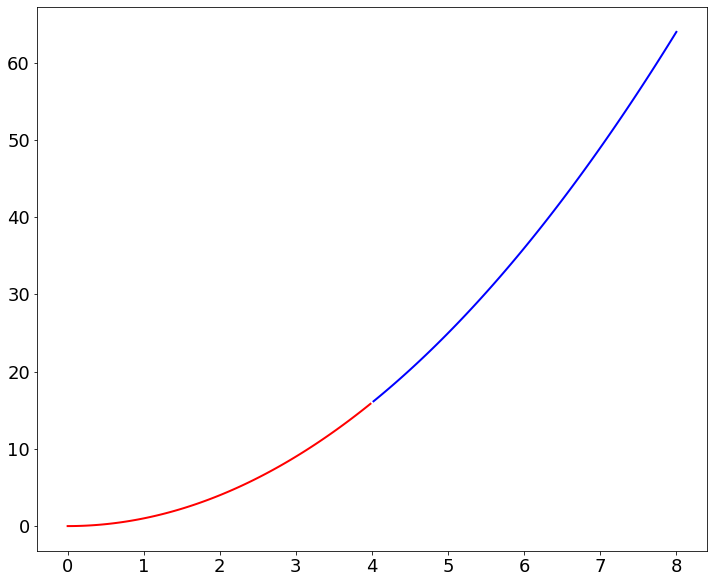

In [2]:
n = 200
L = 8
x = np.linspace(0, L, n)
x1 = x[:100]    # Train
x2 = x[100:200] # Test
n1 = len(x1)
n2 = len(x2)
ftrain = np.power(x1, 2) # Train parabola x = [0,4]
ftest = np.power(x2, 2)  # Test parabola x = [4,8]

plt.plot(x1, ftrain,color='r', LineWidth=2)
plt.plot(x2, ftest,color='b', LineWidth=2)
plt.show()
M = 30 # number of model terms
Eni = np.zeros((100, M))
Ene = np.zeros((100, M))
for jj in range(M):
    phi_i = np.zeros((n1, jj+1))
    phi_e = np.zeros((n2, jj+1))
    for j in range(jj):
        phi_i[:, j] = np.power(x1, j) # interpolation key
        phi_e[:, j] = np.power(x2, j) # extrapolation key
    
    f = np.power(x, 2)
    for j in range(100):
        fni = np.power(x1, 2) + 0.1*np.random.randn(n1) # interpolation
        fne = np.power(x2, 2) + 0.1*np.random.randn(n2) # extrapolation
        
        ani = np.linalg.pinv(phi_i) @ fni
        fnai = phi_i @ ani
        Eni[j, jj] = np.linalg.norm(ftrain-fnai, ord=2)/np.linalg.norm(ftrain, ord=2)
        
        fnae = phi_e @ ani # use loadings from x in [0,4]
        Ene[j, jj] = np.linalg.norm(ftest-fnae, ord=2)/np.linalg.norm(ftest, ord=2)

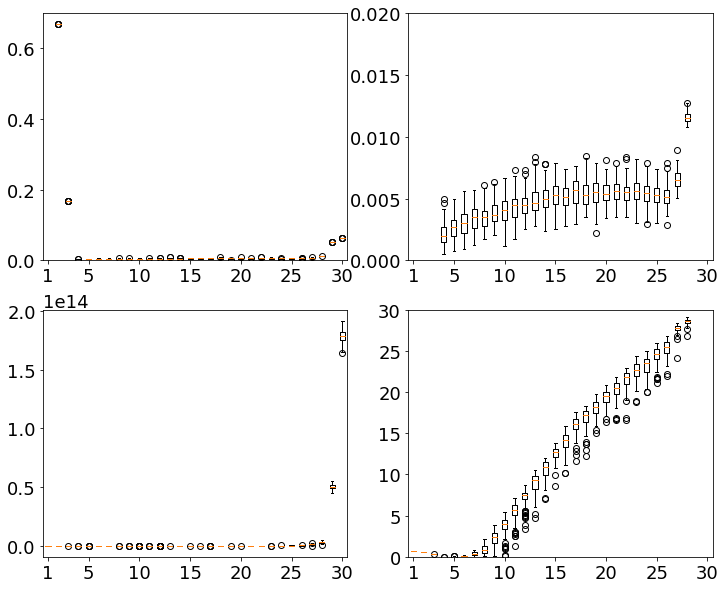

In [3]:
fig,axs = plt.subplots(2,2)
axs = axs.reshape(-1)

axs[0].boxplot(Eni)
axs[0].set_ylim(0,0.7)
axs[1].boxplot(Eni)
axs[1].set_ylim(0,0.02)
axs[2].boxplot(Ene)
axs[3].boxplot(np.log(Ene+1))
axs[3].set_ylim(0,30)

for ax in axs:
    ax.set_xticks((1,5,10,15,20,25,30))
    ax.set_xticklabels((1,5,10,15,20,25,30))

plt.show()